<a href="https://colab.research.google.com/github/ciarangray0/GAA-Video-Analysis/blob/main/YOLO_Bytetrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install libs
!pip install -q ultralytics roboflow
!pip install -q matplotlib opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.7 MB/s eta 0:00:00


In [ ]:
#download dataset from Roboflow
from roboflow import Roboflow
from google.colab import userdata
ROB_OFLOW_API_KEY = userdata.get('roboflowAPI')
WORKSPACE = userdata.get('roboflowWorkspace')
PROJECT = userdata.get('roboflowProject')
VERSION = 4

rf = Roboflow(api_key=ROB_OFLOW_API_KEY)
proj = rf.workspace(WORKSPACE).project(PROJECT)
dataset = proj.version(VERSION).download("yolov8")  # downloads YOLOv8-ready folder

print("Dataset downloaded to:", dataset.location)



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GAA-Player-Detection-FYP-4 in yolov8:: 100%|██████████| 444/444 [00:00<00:00, 2795.88it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded to: /content/GAA-Player-Detection-FYP-4


Data root: /content/GAA-Player-Detection-FYP-4
Train images: 198
Val images  : 9
Sample image: /content/GAA-Player-Detection-FYP-4/train/images/081-010021_-_Scores_Against_frame0003_jpg.rf.a67903859228d80f4cb469c07f3b588c.jpg


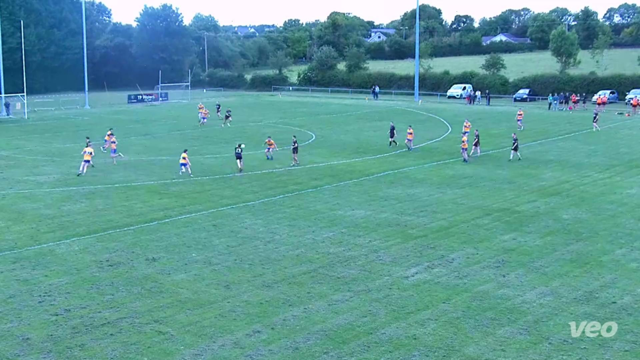

Label file: /content/GAA-Player-Detection-FYP-4/train/labels/081-010021_-_Scores_Against_frame0003_jpg.rf.a67903859228d80f4cb469c07f3b588c.txt
1 0.3744479166666667 0.43945370370370374 0.022776041666666677 0.08867592592592591
1 0.2885989583333333 0.4465925925925926 0.024619791666666658 0.08942592592592596
1 0.13871354166666666 0.45591666666666664 0.01864583333333331 0.11348148148148143
1 0.17994270833333334 0.41633333333333333 0.024989583333333343 0.09386111111111112
1 0.16966666666666666 0.38449074074074074 0.01508854166666668 0.07616666666666666
1 0.142484375 0.42164814814814816 0.021619791666666662 0.08283333333333337
1 0.42244270833333336 0.4138055555555556 0.022854166666666724 0.08067592592592591
1 0.461984375 0.4239074074074074 0.01973437500000005 0.09818518518518515
1 0.64075 0.38740740740740737 0.02106250000000003 0.07929629629629628
1 0.9318385416666667 0.3356388888888889 0.015640625000000106 0.07049074074074074
1 0.8130677083333333 0.33462037037037035 0.018619791666666666 0.07

In [ ]:
#quick check,  list files and show a sample image with label
import os, random
from pathlib import Path
from PIL import Image, ImageOps, ImageDraw

data_dir = Path("/content/GAA-Player-Detection-FYP-4")
print("Data root:", data_dir)
print("Train images:", len(list((data_dir/"train"/"images").glob("*.jpg"))))
print("Val images  :", len(list((data_dir/"valid"/"images").glob("*.jpg"))))

# show a random train image and its label file
img_files = list((data_dir/"train"/"images").glob("*.jpg"))
if img_files:
    img_path = random.choice(img_files)
    print("Sample image:", img_path)
    display(Image.open(img_path).resize((640,360)))
    label_path = img_path.with_suffix(".txt").as_posix().replace("/images/","/labels/")
    print("Label file:", label_path)
    if os.path.exists(label_path):
        print(open(label_path).read())


In [ ]:
# train YOLOv8 model
from ultralytics import YOLO
import os

data_yaml = os.path.join(dataset.location, "data.yaml")
print("Using data config:", data_yaml)

# choose model backbone
# yolov8n.pt (nano) is fastest
model = YOLO("yolov8n.pt")

#train -- tweak epochs/imgsz/batch depending on GPU and dataset size
model.train(
    data=data_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    name="gaa_player_train_colab"
)

# trained weights will be under runs/detect/gaa_player_train_colab/weights/best.pt


Using data config: /content/GAA-Player-Detection-FYP-4/data.yaml
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/GAA-Player-Detection-FYP-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=gaa_player_train_colab, nbs=64, nms=False, opset=None, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79dc0836ba40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# run inference on test images and save outputs
from ultralytics import YOLO
from pathlib import Path

#load best trained model
best = "runs/detect/gaa_player_train_colab/weights/best.pt"
model = YOLO(best)

#run predictions on the test set and save results
test_images = str(Path("/content/GAA-Player-Detection-FYP-4") / "valid" / "images")
print("Running inference on:", test_images)
model.predict(source=test_images, save=True, conf=0.1, line_thickness=1)

#predictions saved to runs/detect/predict by default (or runs/detect/predict2..)


Running inference on: /content/GAA-Player-Detection-FYP-4/valid/images
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.

image 1/9 /content/GAA-Player-Detection-FYP-4/valid/images/012-001032_-_Scores_For_frame0045_jpg.rf.ba44c3b0ef104fe3534aac25a13b10da.jpg: 384x640 22 GAA-player-lablerss, 1 Refree-lablers, 226.8ms
image 2/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0000_jpg.rf.d729d54bc73805db8ada3f62869567fb.jpg: 384x640 26 GAA-player-lablerss, 1 Refree-lablers, 21.2ms
image 3/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0017_jpg.rf.2b96c6a49132b2e687d0ff0b76ee079a.jpg: 384x640 13 GAA-player-lablerss, 1 Refree-lablers, 58.6ms
image 4/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0030_jpg.rf.a707b13269f1ac878aedff53ff3c782b.jpg: 384x640 18 GAA-player-lablerss, 1 Refree-lablers, 26.8ms
image 5/9 /content/GAA-Player-Detection-FYP-

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ball-labelers', 1: 'GAA-player-lablers', 2: 'Refree-lablers'}
 obb: None
 orig_img: array([[[ 81,  65,  72],
         [ 80,  64,  71],
         [ 79,  61,  68],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 80,  64,  71],
         [ 80,  62,  69],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 81,  65,  72],
         [ 82,  64,  71],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        ...,
 
        [[ 95, 149, 120],
         [ 98, 152, 123],
         [101, 155, 126],
         ...,
         [ 88, 131, 104],
         [ 83, 128, 102],
         [ 80, 127, 101]],
 
        [[ 96, 150, 121],
         [102, 156, 127],
     

In [ ]:
# run tracking (YOLOv8 + ByteTrack)
#
from ultralytics import YOLO
video_path = "/content/040 002429_-_Scores_For.mp4"
best = "runs/detect/gaa_player_train_colab/weights/best.pt"
model = YOLO(best)

#this uses the built-in tracker integration
# output saved automatically.
model.track(source=video_path, tracker="bytetrack.yaml", save=True, conf=0.35, show=True, line_thickness=1)
#output video saved to runs/track/exp


requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 196ms
Prepared 1 package in 55ms
Installed 1 package in 3ms
 + lap==0.5.12

requirements: AutoUpdate success ✅ 0.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




FileNotFoundError: /content/040 002429_-_Scores_For.mp4 does not exist

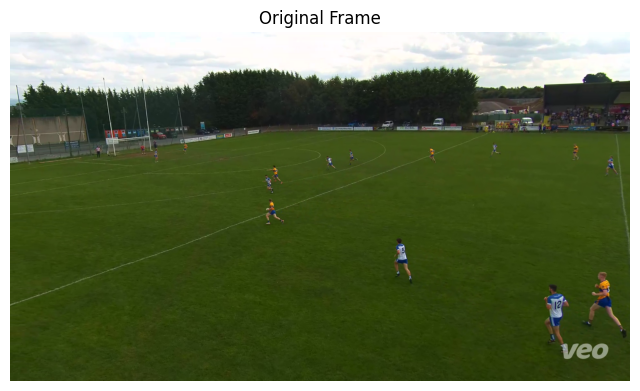

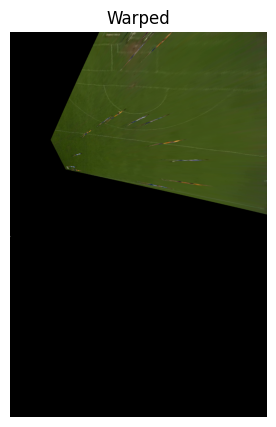

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path = "/content/040 002429_-_Scores_For.mp4"
cap = cv2.VideoCapture(video_path)

FRAME_IDX = 40
cap.set(cv2.CAP_PROP_POS_FRAMES, FRAME_IDX)
ret, frame = cap.read()
cap.release()

assert ret, "Failed to read frame"
h, w = frame.shape[:2]

plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Original Frame")
plt.axis("off")
plt.show()

# --------------------------------------------------
# Manually selected correspondences (your points)
# --------------------------------------------------
pts_image = np.array([
    [327, 381],
    [436, 366],
    [877, 311],
    [1487, 314],
    [431, 438],
    [863, 361],
    [381, 417],
    [700, 366],
    [534, 367],
    [312, 398],
    [1109, 309]
], dtype=np.float32)

pts_pitch = np.array([
    [39.25, 0],
    [45.75, 0],
    [85, 0],
    [85, 45],
    [33, 20],
    [52, 20],
    [33, 13],
    [52, 13],
    [35.5, 4.5],
    [49.5, 4.5],
    [85, 20]
], dtype=np.float32)

# --------------------------------------------------
# Normalize pitch to image-sized plane
# --------------------------------------------------
PITCH_W = 85.0
PITCH_H = 140.0
OUT_W = 1000
OUT_H = 1500

pts_pitch_norm = np.column_stack([
    pts_pitch[:, 0] / PITCH_W * OUT_W,
    pts_pitch[:, 1] / PITCH_H * OUT_H
]).astype(np.float32)

# --------------------------------------------------
# Compute base homography
# --------------------------------------------------
H_img2pitch, _ = cv2.findHomography(pts_image, pts_pitch_norm, cv2.RANSAC, 5)
assert H_img2pitch is not None

# --------------------------------------------------
# Distorted homography warp (correct version)
# --------------------------------------------------
def distorted_homography_warp(img, H, out_w, out_h, k1=1e-7):
    warped = np.zeros((out_h, out_w, 3), dtype=np.uint8)
    H_inv = np.linalg.inv(H)

    cx, cy = out_w / 2, out_h / 2

    for y in range(out_h):
        for x in range(out_w):
            # Ideal back-projection
            p = np.array([x, y, 1.0])
            src = H_inv @ p
            src /= src[2]

            u, v = src[0], src[1]

            # Apply radial distortion IN PITCH SPACE
            dx = x - cx
            dy = y - cy
            r2 = dx*dx + dy*dy

            x_d = x + dx * k1 * r2
            y_d = y + dy * k1 * r2

            # Reproject distorted point
            p_d = np.array([x_d, y_d, 1.0])
            src_d = H_inv @ p_d
            src_d /= src_d[2]

            u_d, v_d = src_d[0], src_d[1]

            if 0 <= int(v_d) < h and 0 <= int(u_d) < w:
                warped[y, x] = img[int(v_d), int(u_d)]

    return warped

# --------------------------------------------------
# Run warp
# --------------------------------------------------
warped = distorted_homography_warp(
    frame,
    H_img2pitch,
    OUT_W,
    OUT_H,
    k1=8e-8   # <-- tune this value
)

plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Warped")
plt.axis("off")
plt.show()


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/346) /content/040 002429_-_Scores_For.mp4: 384x640 18 GAA-player-lablerss, 7.5ms
video 1/1 (frame 2/346) /content/040 002429_-_Scores_For.mp4: 384x640 15 GAA-player-lablerss, 7.9ms
video 1/1 (frame 3/346) /content/040 002429_-_Scores_For.mp4: 384x640 13 GAA-player-lablerss, 7.7ms
video 1/1 (frame 4/346) /content/040 002429_-_Scores_For.mp4: 384x640 12 GAA-player-lablerss, 7.5ms
video 1/1 (frame 5/346) /content/040 002429_-_Scores_For.m

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

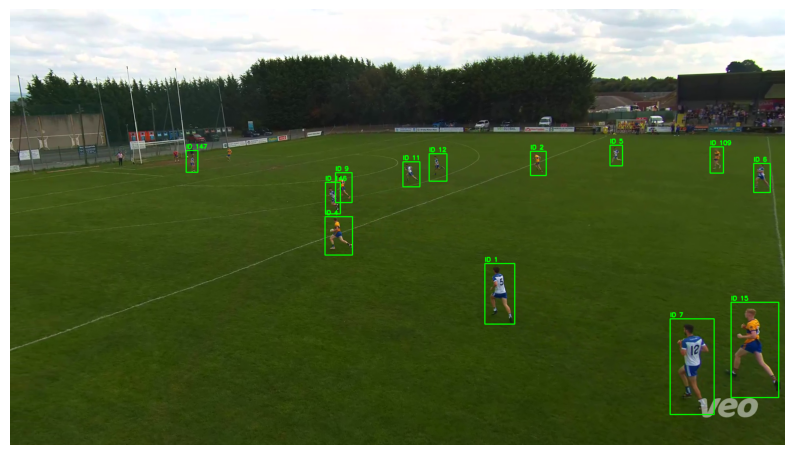

In [ ]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt

#as shown here, simple homography is not possible for mapping

# -----------------------------
#  Load tracked video
# -----------------------------
video_path = "/content/040 002429_-_Scores_For.mp4"
best = "/content/best.pt"
model = YOLO(best)

x1_pixel = 327
y1_pixel = 381

x2_pixel = 436
y2_pixel = 366

x3_pixel = 877
y3_pixel = 311

x4_pixel = 1487
y4_pixel = 314

x5_pixel = 431
y5_pixel = 438

x6_pixel = 863
y6_pixel = 361

x7_pixel = 381
y7_pixel = 417

x8_pixel = 700
y8_pixel = 366

x9_pixel = 534
y9_pixel = 367

x10_pixel = 312
y10_pixel = 398

x11_pixel = 1109
y11_pixel = 309

# Pixel coordinates in reference frame
pts_frame_ref = np.array([
    [x1_pixel, y1_pixel],  # bottom left goalpost
    [x2_pixel, y2_pixel],  # bottom right goalpost
    [x3_pixel, y3_pixel],  # corner flag (lhs)
    [x4_pixel, y4_pixel],  # 45 m line (lhs)
    [x5_pixel, y5_pixel],  # left semi circle
    [x6_pixel, y6_pixel],  # right semi circle
    [x7_pixel, y7_pixel],  # left 13m box
    [x8_pixel, y8_pixel],  # right 13m box
    [x9_pixel, y9_pixel],  # left goalie box
    [x10_pixel, y10_pixel], # right goalie box
    [x11_pixel, y11_pixel] # left 21
], dtype=np.float32)

# Corresponding real-world pitch coordinates (meters)
pts_pitch_ref = np.array([
    [39.25, 0], # bottom left goalpost
    [45.75, 0], # bottom right goalpost
    [85, 0], # corner flag (lhs)
    [85, 45], # 45 m line (lhs)
    [33, 20], #
    [52, 20], #
    [33, 13], #
    [52, 13], #
    [35.5, 4.5],
    [49.5, 4.5],
    [85, 20]
], dtype=np.float32)

results = model.track(
    source=video_path,
    tracker="bytetrack.yaml",
    save=False,
    stream=False
)

# Compute homography using the reference points. This matrix will be used for all frames.
# For the homography to be accurate, these points should ideally be from a static reference frame.
H_ref, status = cv2.findHomography(pts_frame_ref, pts_pitch_ref)
assert H_ref is not None

# List to store all mapped players across all frames
all_mapped_players = []

# Iterate through each frame's results and map player positions
for frame_idx, frame_result in enumerate(results):
    if frame_result.boxes is None or len(frame_result.boxes) == 0:
        # Skip frames with no detections or an empty boxes object
        continue

    boxes = frame_result.boxes
    for box, conf, track_id in zip(boxes.xyxy, boxes.conf, boxes.id):
        x1, y1, x2, y2 = box.cpu().numpy()
        x_c = (x1 + x2) / 2  # Calculate center x-coordinate of the bounding box
        y_c = (y1 + y2) / 2  # Calculate center y-coordinate of the bounding box

        pixel_pt = np.array([[[x_c, y_c]]], dtype=np.float32)

        # Apply the homography to convert pixel coordinates to pitch coordinates
        pitch_pt = cv2.perspectiveTransform(pixel_pt, H_ref)

        x_m, y_m = pitch_pt[0, 0]

        all_mapped_players.append({
            "frame_idx": frame_idx,
            "track_id": int(track_id),
            "x_m": float(x_m),
            "y_m": float(y_m),
            "conf": float(conf)
        })

# Create a DataFrame from the collected data for all frames
df_all_frames = pd.DataFrame(all_mapped_players)
print(df_all_frames)

# The visualization code for a single frame has been removed to focus on data conversion.
# If you need visualization for specific frames or an aggregated view, please let me know.